## Vela Project 6

Bank Churn Prediction
Objective:
Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

Context: 
Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.
Data Description: 
The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.
Link to the Kaggle project site:https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling
Data Dictionary:
RowNumber: Row number.
CustomerId: Unique identification key for different customers.
Surname: Surname of the customer
Credit Score: Credit score is a measure of an individual's ability to pay back the borrowed amount. It is the numerical representation of their creditworthiness. A credit score is a 3-digit number that falls in the range of 300-900, 900 being the highest.
Geography: The country to which the customer belongs.
Gender: The gender of the customer.
Age: Age of the customer.
Tenure: The period of time a customer has been associated with the bank.
Balance: The account balance (the amount of money deposited in the bank account) of the customer.
NumOfProducts: How many accounts, bank account affiliated products the person has.
HasCrCard: Does the customer have a credit card through the bank?
IsActiveMember: Subjective, but for the concept
EstimatedSalary: Estimated salary of the customer.
Exited: Did they leave the bank after all?
Points Distribution:
The points distribution for this case is as follows:

1. Read the dataset
2. Drop the columns which are unique for all users like IDs (5 points)
3. Perform bivariate analysis and give your insights from the same (5 points) 
4. Distinguish the feature and target set and divide the data set into training and test sets (5 points)
5. Normalize the train and test data (10points)
6. Initialize & build the model. Identify the points of improvement and implement the same. (20)
7. Predict the results using 0.5 as a threshold (10points)
8. Print the Accuracy score and confusion matrix (5 points)


### Importing all critical libraries 

In [1]:

import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers


### Reading the data and creating dataset

In [2]:
data = pd.read_csv("bank.csv")

In [3]:
data.head(30)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
data.shape

(10000, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Drop the columns which are unique for all users like IDs

In [6]:
data = data.drop("RowNumber", axis = 1)

In [7]:
data = data.drop("Surname", axis = 1)

In [8]:
data = data.drop("CustomerId", axis = 1)

### Perform bivariate analysis and give your insights from the same

C:\Users\16232\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


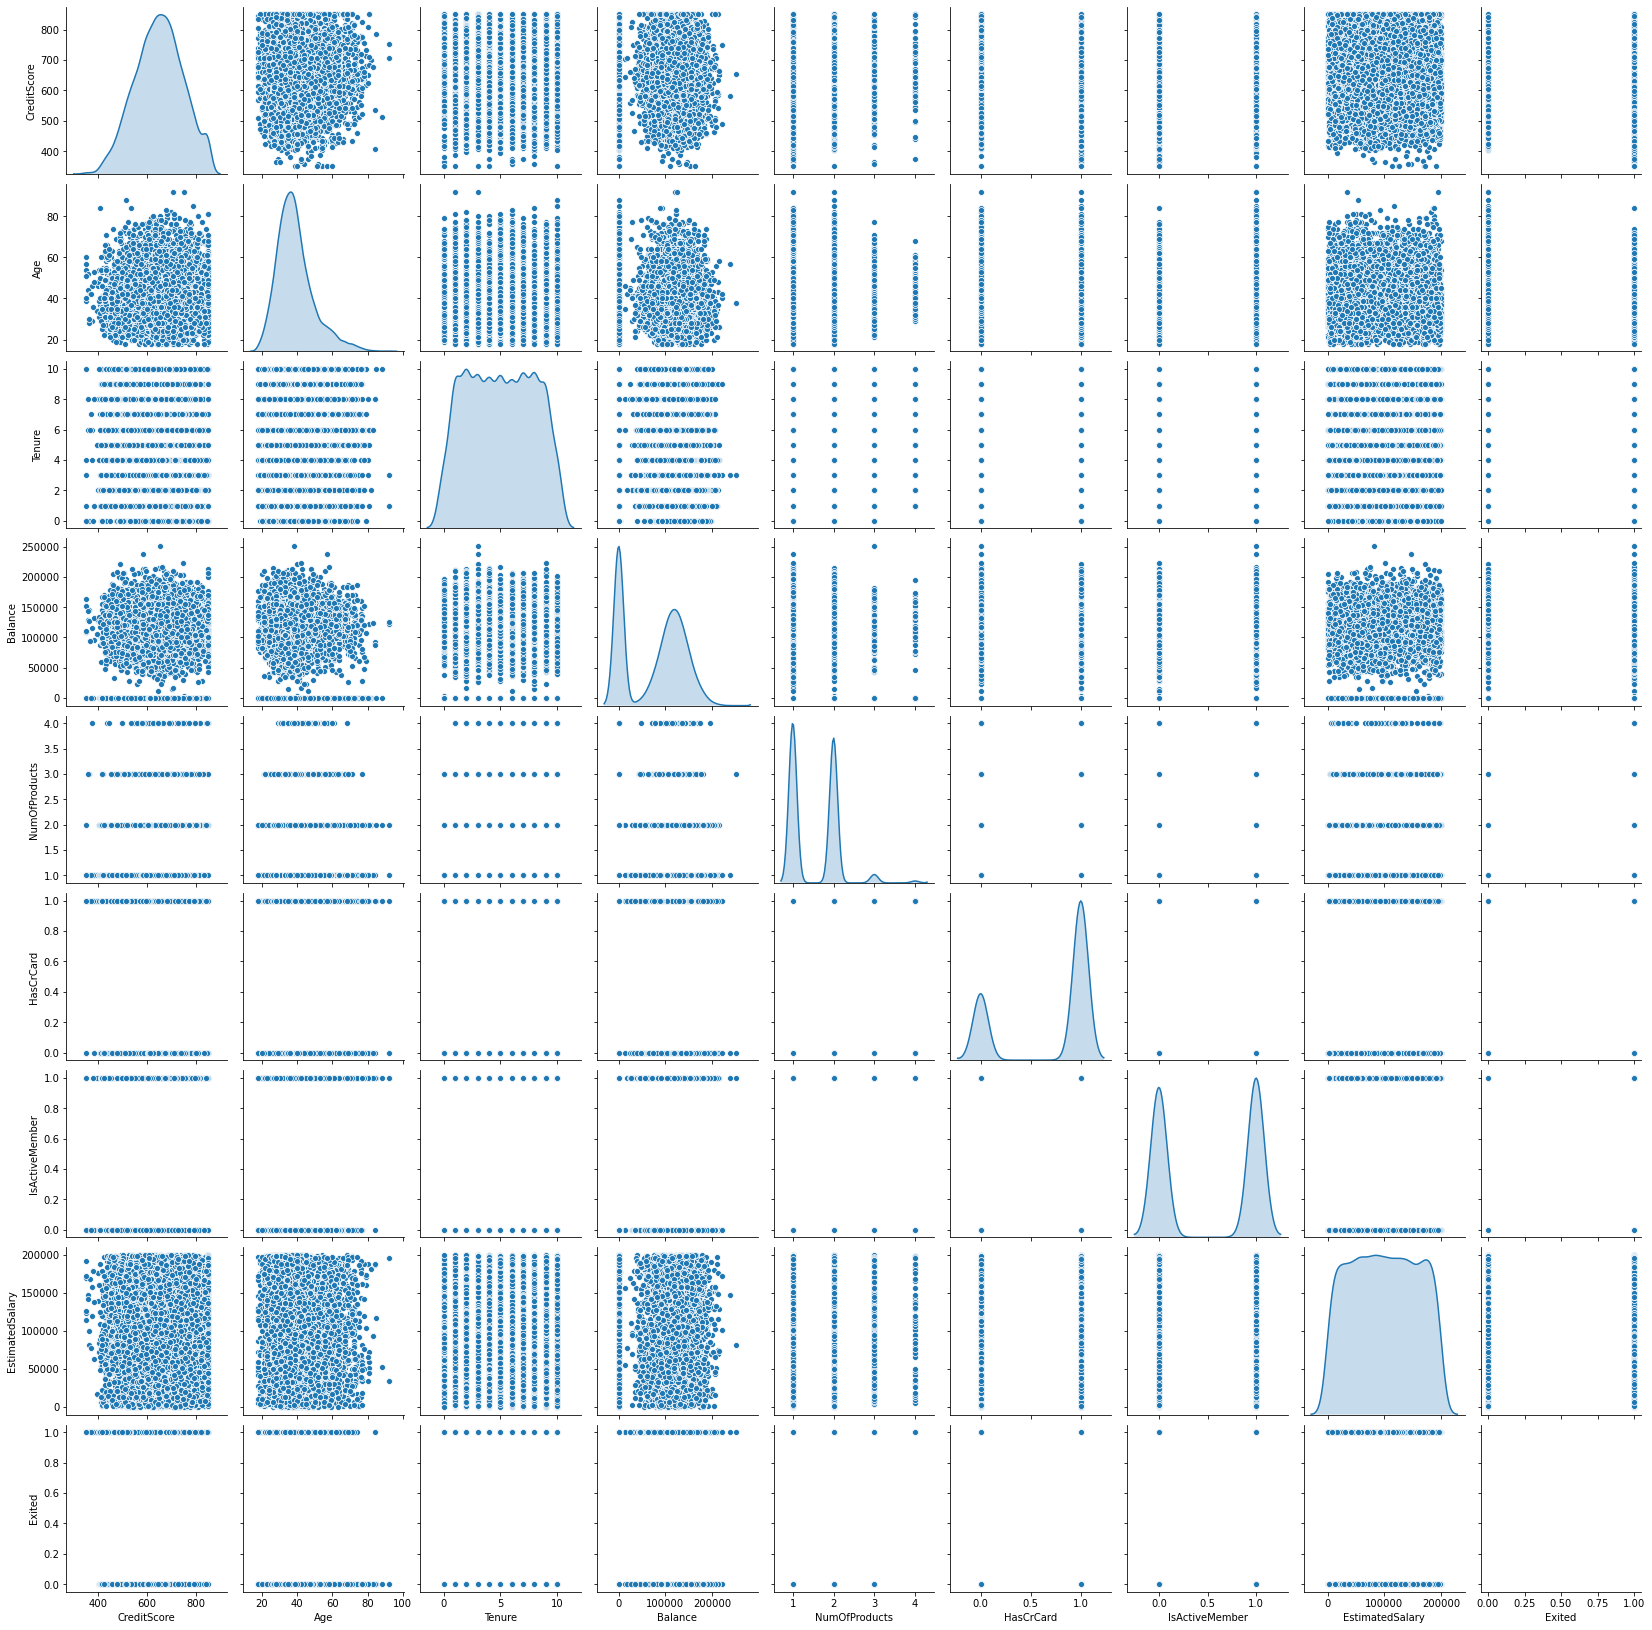

In [9]:
# Pair plot to check the data distribution and potential clusters 

import seaborn as sns
sns.pairplot(data, diag_kind='kde') 

In [12]:

import pandas_profiling
pandas_profiling.ProfileReport(data, title='Pandas Profiling Report')

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Based on the Bivariate analysis it is evident that there is no major correlation between any of the parameters and also the Pandas profiling report indicates that there are no major missing values or null values to be corrected . From the analysis of the data it is very clear that the some of the data like Estimated Salary , Balance , Age have to be scaled as they are divergent and have extreme values 

In [10]:
# Creating another data frame for getting dummies and also for Scaling 
datamod = data
datamod = pd.get_dummies(datamod, drop_first=True)


In [11]:
datamod.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


### Distinguish the feature and target set and divide the data set into training and test sets (5 points)
### Normalize the train and test data (10points)

In [12]:
# Normalising the data with MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
datamod['Balance'] = scaler.fit_transform(datamod['Balance'].values.reshape(-1,1))
datamod['EstimatedSalary'] = scaler.fit_transform(datamod['EstimatedSalary'].values.reshape(-1,1))
datamod['Age'] = scaler.fit_transform(datamod['Age'].values.reshape(-1,1))
datamod['CreditScore'] = scaler.fit_transform(datamod['CreditScore'].values.reshape(-1,1))

In [13]:
X_data = datamod.iloc[:,[0,1,2,3,4,5,6,7,9,10,11]]

In [14]:
X_data.shape

(10000, 11)

In [15]:
X_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,0.538,0.324324,2,0.000000,1,1,1,0.506735,0,0,0
1,0.516,0.310811,1,0.334031,1,0,1,0.562709,0,1,0
2,0.304,0.324324,8,0.636357,3,1,0,0.569654,0,0,0
3,0.698,0.283784,1,0.000000,2,0,0,0.469120,0,0,0
4,1.000,0.337838,2,0.500246,1,1,1,0.395400,0,1,0


In [16]:
y_data = datamod.iloc[:, -4]
y_data

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [17]:
y_data.shape

(10000,)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state = 7)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 11)
(2000, 11)
(8000,)
(2000,)


### Initialize & build the model. Identify the points of improvement and implement the same


In [20]:
model = Sequential()

In [21]:
model.add(Dense(6, input_shape = (X_train.shape[1],), activation = 'relu'))
model.add(Dense(3, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

##### Model compile [optimizers and loss functions]




In [22]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 21        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


### Training [Forward pass and Backpropagation]

Training the model

In [24]:
history = model.fit(X_train, y_train.values, batch_size = 70, epochs = 100, validation_split = 0.2, verbose = 1)

Epoch 1/100
92/92 [==============================] - 2s 18ms/step - loss: 0.5841 - accuracy: 0.8046 - val_loss: 0.5410 - val_accuracy: 0.7894
Epoch 2/100
92/92 [==============================] - 0s 2ms/step - loss: 0.5315 - accuracy: 0.7938 - val_loss: 0.5211 - val_accuracy: 0.7894
Epoch 3/100
92/92 [==============================] - 0s 2ms/step - loss: 0.5052 - accuracy: 0.8019 - val_loss: 0.5141 - val_accuracy: 0.7894
Epoch 4/100
92/92 [==============================] - 0s 2ms/step - loss: 0.5085 - accuracy: 0.7952 - val_loss: 0.5095 - val_accuracy: 0.7894
Epoch 5/100
92/92 [==============================] - 0s 2ms/step - loss: 0.4882 - accuracy: 0.8043 - val_loss: 0.5049 - val_accuracy: 0.7894
Epoch 6/100
92/92 [==============================] - 0s 2ms/step - loss: 0.4946 - accuracy: 0.7960 - val_loss: 0.5012 - val_accuracy: 0.7894
Epoch 7/100
92/92 [==============================] - 0s 1ms/step - loss: 0.4954 - accuracy: 0.7906 - val_loss: 0.4988 - val_accuracy: 0.7894
Epoch 8/100


Epoch 59/100
92/92 [==============================] - 0s 1ms/step - loss: 0.3790 - accuracy: 0.8405 - val_loss: 0.3995 - val_accuracy: 0.8331
Epoch 60/100
92/92 [==============================] - 0s 1ms/step - loss: 0.3700 - accuracy: 0.8451 - val_loss: 0.3974 - val_accuracy: 0.8338
Epoch 61/100
92/92 [==============================] - 0s 2ms/step - loss: 0.3791 - accuracy: 0.8368 - val_loss: 0.3972 - val_accuracy: 0.8306
Epoch 62/100
92/92 [==============================] - 0s 1ms/step - loss: 0.3739 - accuracy: 0.8442 - val_loss: 0.3953 - val_accuracy: 0.8344
Epoch 63/100
92/92 [==============================] - 0s 1ms/step - loss: 0.3729 - accuracy: 0.8378 - val_loss: 0.3946 - val_accuracy: 0.8350
Epoch 64/100
92/92 [==============================] - 0s 1ms/step - loss: 0.3666 - accuracy: 0.8499 - val_loss: 0.3998 - val_accuracy: 0.8344
Epoch 65/100
92/92 [==============================] - 0s 2ms/step - loss: 0.3690 - accuracy: 0.8435 - val_loss: 0.3950 - val_accuracy: 0.8350
Epoch 

## Predict the results using 0.5 as a threshold (10points)

In [25]:
y_predict = model.predict(X_test)
y_predict



array([[0.19186077],
       [0.22578898],
       [0.02632508],
       ...,
       [0.15965474],
       [0.20569053],
       [0.11332366]], dtype=float32)

In [26]:
# Building an array with classes of 1 or zero using 0.5 as a threshold
y_pred = []
for i in y_predict:
    if i > .5 :
        y_pred.append(1)
    else:
        y_pred.append(0)

In [27]:
y_pred

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [28]:
results = model.evaluate(X_test, y_test.values)


63/63 [==============================] - 0s 742us/step - loss: 0.3662 - accuracy: 0.8560


In [29]:
print(model.metrics_names)
print(results)    

['loss', 'accuracy']
[0.36623767018318176, 0.8560000061988831]


### Print the Accuracy score and confusion matrix

In [30]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

63/63 [==============================] - 0s 676us/step - loss: 0.3662 - accuracy: 0.8560
Accuracy Score: 0.8560000061988831
Confusion Matrix


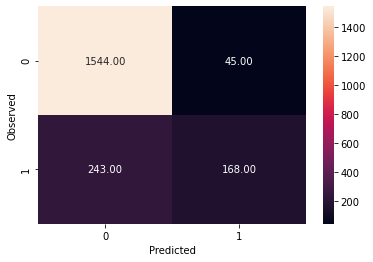

None

Recall: 0.40875912408759124

Precision: 0.7887323943661971

F1 Score: 0.5384615384615384



In [32]:
print('Accuracy Score: '+ str(model.evaluate(X_test,y_test.values)[1]))

print('Confusion Matrix')
print(draw_cm(y_test,y_pred))
print()
print("Recall:",recall_score(y_test,y_pred))
print()
print("Precision:",precision_score(y_test,y_pred))
print()
print("F1 Score:",f1_score(y_test,y_pred))
print()




####  In the above scenario Precision is a more important metric and we are able to get a precision of 78.8%